In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
#df = pd.read_excel('data/GTD_0617dist/globalterrorismdb_0617dist.xlsx')
df = pd.read_pickle('GTD_df.p')

In [7]:
#df.to_pickle('GTD_df.p')

In [8]:
df.shape

(170350, 135)

In [9]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
df[df.gname == 'Hezbollah']

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
18123,198303000002,1983,3,0,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
18218,198303150013,1983,3,15,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
18232,198303160014,1983,3,16,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
18497,198304180001,1983,4,18,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
20000,198310230007,1983,10,23,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
20001,198310230008,1983,10,23,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
20093,198311040001,1983,11,4,NaN,0,NaT,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
20375,198312120006,1983,12,12,NaN,0,NaT,106,Kuwait,10,...,NaN,NaN,NaN,NaN,PGIS,1,1,0,1,NaN
20376,198312120007,1983,12,12,NaN,0,NaT,106,Kuwait,10,...,NaN,NaN,NaN,NaN,PGIS,1,1,0,1,NaN
20377,198312120008,1983,12,12,NaN,0,NaT,106,Kuwait,10,...,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN


In [11]:
len(df['gname'].unique())

3454

In [12]:
df[df.gname == 'Taliban'].groupby('iyear').count().eventid

iyear
1995       4
2001       4
2002       7
2003      50
2004      55
2005     120
2006     164
2007     207
2008     256
2009     268
2010     307
2011     214
2012     800
2013     773
2014    1033
2015    1249
2016    1064
Name: eventid, dtype: int64

In [13]:
def plot_group(group_name):
    plt.plot(df[df.gname == group_name].groupby('iyear').count().eventid, label=group_name)
    plt.title('Activity Over Time by Terrorist Organization')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.legend();

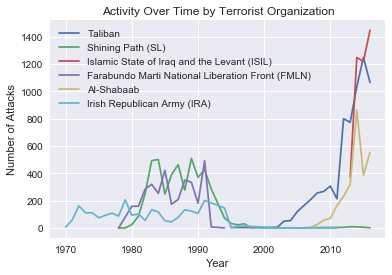

In [14]:
for group, count in df['gname'].value_counts()[1:7].iteritems():
    plot_group(group)

In [15]:
def plot_country(country_name):
    plt.plot(df[df.country_txt == country_name].groupby('iyear').count().eventid, label=country_name)
    plt.title('Terrorist Activity Over Time by Country')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.legend();

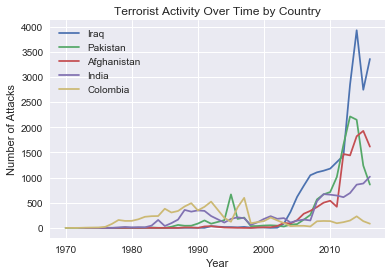

In [16]:
for country, count in df['country_txt'].value_counts()[0:5].iteritems():
    plot_country(country)

In [17]:
df.columns[10:11]

Index(['region_txt'], dtype='object')

In [18]:
def plot_region(region_name):
    plt.plot(df[df.region_txt == region_name].groupby('iyear').count().eventid, label=region_name)
    plt.title('Terrorist Activity Over Time by Region')
    plt.xlabel('Year')
    plt.ylabel('Number of Attacks')
    plt.legend();

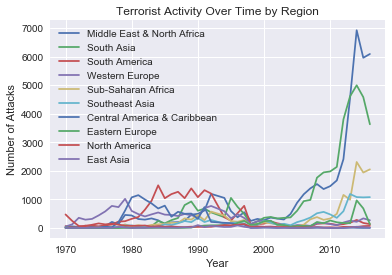

In [19]:
for region, count in df['region_txt'].value_counts()[:10].iteritems():
    plot_region(region)

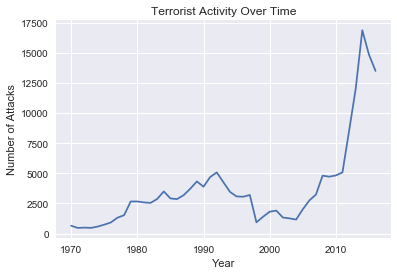

In [20]:
plt.plot(df.groupby('iyear').count().eventid)
plt.title('Terrorist Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks');

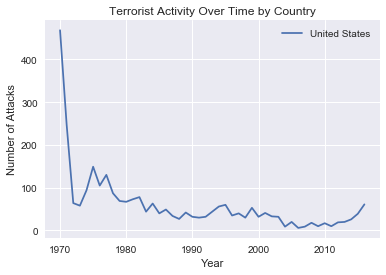

In [21]:
plot_country('United States')

In [22]:
len(df[df.groupby('gname')['gname'].transform(len) > 1000]['gname'].unique())

18

In [23]:
df[df.groupby('gname')['gname'].transform(len) > 1000]['gname'].unique()

array(['Unknown', "New People's Army (NPA)", 'Palestinians',
       'Irish Republican Army (IRA)',
       'Basque Fatherland and Freedom (ETA)',
       'National Liberation Army of Colombia (ELN)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Liberation Tigers of Tamil Eelam (LTTE)', 'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)', 'Maoists',
       "Kurdistan Workers' Party (PKK)", 'Taliban',
       'Communist Party of India - Maoist (CPI-Maoist)', 'Al-Shabaab',
       'Tehrik-i-Taliban Pakistan (TTP)', 'Boko Haram',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

In [24]:
df[df['iyear'] > 2000].shape

(98773, 135)

In [25]:
df[(df['iyear'] > 2000) & (df['country_txt'] == 'United States')].shape

(370, 135)

In [26]:
df[(df['iyear'] > 2000) & (df['country_txt'] == 'United States')]['gname'].value_counts()

Unknown                                          126
Earth Liberation Front (ELF)                      50
Animal Liberation Front (ALF)                     30
Anti-Government extremists                        29
Jihadi-inspired extremists                        25
Anti-Muslim extremists                            18
Anti-Abortion extremists                          18
Muslim extremists                                 10
White extremists                                  10
Anti-Police extremists                             6
Anti-Semitic extremists                            5
Sovereign Citizen                                  4
Al-Qaida                                           4
Anti-White extremists                              3
Anarchists                                         3
Anti-Gun Control extremists                        3
Neo-Nazi extremists                                2
Veterans United for Non-Religious Memorials        2
Coalition to Save the Preserves (CSP)         

In [27]:
df[(df['iyear'] > 2000) & (df['country_txt'] == 'United States') & (df['gname'] == 'Earth Liberation Front (ELF)')]['scite1']

71584    U.S. Government’s Sentencing Memorandum for CR...
71635    Andy Geller, “FBI Storms L.I. Home in Hunt for...
71840    "Eco-terrorism group claims Tulare attack Fire...
72044    U.S. Government’s Sentencing Memorandum for CR...
72065    "ELF claims attempted arson attack on Minnesot...
72106    William McCall, "Two men indicted in ELF arson...
72213    U.S. Government’s Sentencing Memorandum for CR...
72214    U.S. Government’s Sentencing Memorandum for CR...
72261    "Three logging trucks torched in Oregon," The ...
72404           FBI, "Terrorism 2000/2001,"FBI, DOJ, 2001.
73176    U.S. Government’s Sentencing Memorandum for CR...
73244    Eric Lindquist, "Former honor student turns ec...
73245    Eric Lindquist, "Former honor student turns ec...
73600    Heron Marquez Estrada, "Earth Liberation Front...
73826           FBI, "Terrorism 2002-2005,"FBI, DOJ, 2005.
74409    Dan Hopey, "Radical Group says it set fire at ...
74434    Maryanne George, "Investigators Link Militants.

In [28]:
df[(df['iyear'] > 2000) & (df['nkill'] >0)].shape

(50253, 135)

In [29]:
df[(df['iyear'] > 2000) & (df['nkill'] > 0)]['gname'].value_counts().shape

(772,)

In [30]:
def plot_group_v(group_name):
    plt.plot(df[df.gname == group_name].groupby('iyear').sum()['nkill'], label=group_name)
    plt.title('Activity Over Time by Terrorist Organization')
    plt.xlabel('Year')
    plt.ylabel('Number of Fatalities')
    plt.legend();

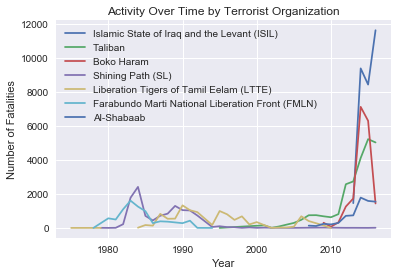

In [31]:
for group, count in df.groupby('gname').sum()['nkill'].sort_values(ascending=False)[1:8].iteritems():
    plot_group_v(group)

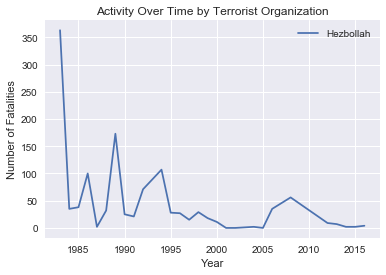

In [32]:
plot_group_v('Hezbollah')

In [33]:
def plot_country_v(country_name):
    plt.plot(df[df.country_txt == country_name].groupby('iyear').sum()['nkill'], label=country_name)
    plt.title('Activity Over Time by Country')
    plt.xlabel('Year')
    plt.ylabel('Number of Fatalities')
    plt.legend();

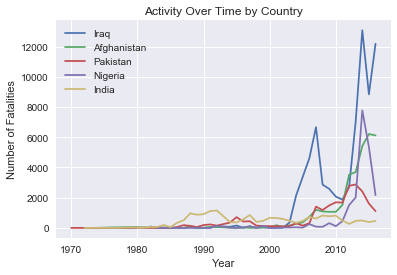

In [34]:
for country, count in df.groupby('country_txt').sum()['nkill'].sort_values(ascending=False)[0:5].iteritems():
    plot_country_v(country)

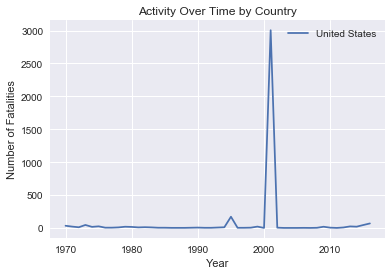

In [35]:
plot_country_v('United States')

This is Oklahoma City and 9/11

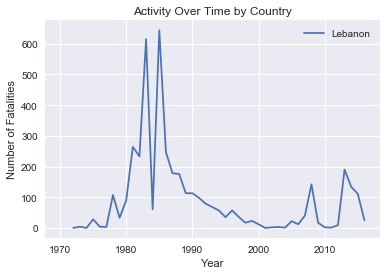

In [36]:
plot_country_v('Lebanon')

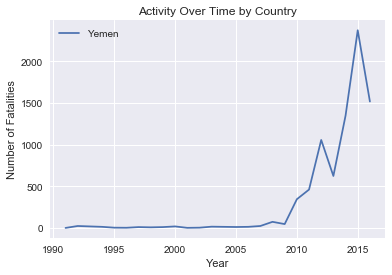

In [37]:
plot_country_v('Yemen')

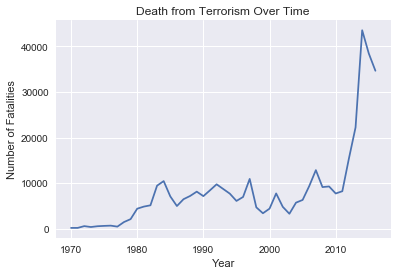

In [38]:
plt.plot(df.groupby('iyear').sum()['nkill'])
plt.title('Death from Terrorism Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities');

In [39]:
df[(df['iyear'] == 1970) & (df['country_txt'] == 'United States')]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
10,197001050001,1970,1,1,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
11,197001060001,1970,1,6,NaN,0,NaT,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
13,197001090001,1970,1,9,NaN,0,NaT,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
14,197001090002,1970,1,9,NaN,0,NaT,217,United States,1,...,The fire began at 8:30 PM. The Armed Commandos...,Committee on the Judiciary United States Sena...,"""No Evidence Of Arson Found In Barkers Fire,"" ...","""Toward People's War for Independence and Soci...",Hewitt Project,0,0,0,0,NaN
17,197001120001,1970,1,12,NaN,0,NaT,217,United States,1,...,"One half hour after the bomb explosion, an ano...","""Blast Damages Flatbush School,"" New York Time...","Linda Greenhouse, ""Madison School Puzzled By B...",Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9,NaN
18,197001120002,1970,1,12,NaN,0,NaT,217,United States,1,...,NaN,Committee on the Judiciary United States Sena...,"""Toward People's War for Independence and Soci...",NaN,Hewitt Project,-9,-9,0,-9,NaN


## Looking at weapons used

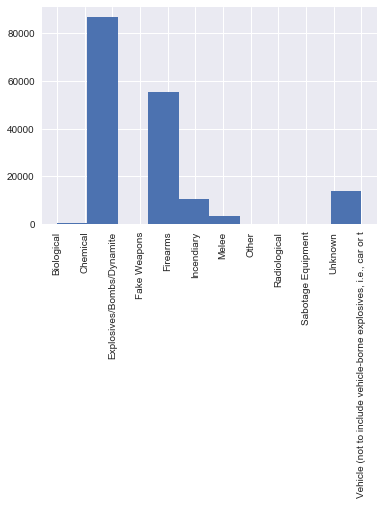

In [40]:
plt.hist(df['weaptype1_txt'].dropna());
plt.xticks(rotation='vertical');

In [41]:
df[df['nkill']>0]['weaptype1_txt'].dropna().value_counts()

Firearms                                                                       38348
Explosives/Bombs/Dynamite                                                      30397
Unknown                                                                         6141
Melee                                                                           2012
Incendiary                                                                       681
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       60
Chemical                                                                          57
Other                                                                             32
Sabotage Equipment                                                                 8
Biological                                                                         6
Fake Weapons                                                                       1
Name: weaptype1_txt, dtype: int64

In [42]:
df[df['nkill']>0].groupby('weaptype1_txt').sum()['nkill'].sort_values(ascending=False)

weaptype1_txt
Firearms                                                                       166224.0
Explosives/Bombs/Dynamite                                                      160534.0
Unknown                                                                         37494.0
Melee                                                                           10143.0
Incendiary                                                                       5282.0
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      3124.0
Chemical                                                                          580.0
Other                                                                             114.0
Sabotage Equipment                                                                 49.0
Biological                                                                          9.0
Fake Weapons                                                                        1.0
Name: nkill, dtype

In [43]:
df[(df['nkill']>0) & (df['iyear']>2000)].groupby(['gname', 'weaptype1_txt']).sum().loc[['Islamic State of Iraq and the Levant (ISIL)','Taliban', 'Al-Qaida'],['nkill']]

nkill
gname                                       weaptype1_txt                                              
Al-Qaida                                    Explosives/Bombs/Dynamite                             321.0
                                            Firearms                                               34.0
                                            Vehicle (not to include vehicle-borne explosive...   2998.0
Islamic State of Iraq and the Levant (ISIL) Chemical                                               34.0
                                            Explosives/Bombs/Dynamite                           18694.0
                                            Firearms                                             5278.0
                                            Incendiary                                            111.0
                                            Melee                                                 192.0
                                            Other                                                  73.0
                                            Unknown                                              6507.0
Taliban                                     Chemical                                               12.0
                                            Explosives/Bombs/Dynamite                            9973.0
                                            Firearms                                            10555.0
                                            Incendiary                                            189.0
                                            Melee                                                 196.0
                                            Other                                                   7.0
                                            Unknown                                              3547.0
                                            Vehicle (not to include vehicle-borne explosive...      3.0

## Looking at hostage fatalities

In [44]:
df[(df['iyear'] > 2000) & (df['ishostkid'] == 1)].shape

(7875, 135)

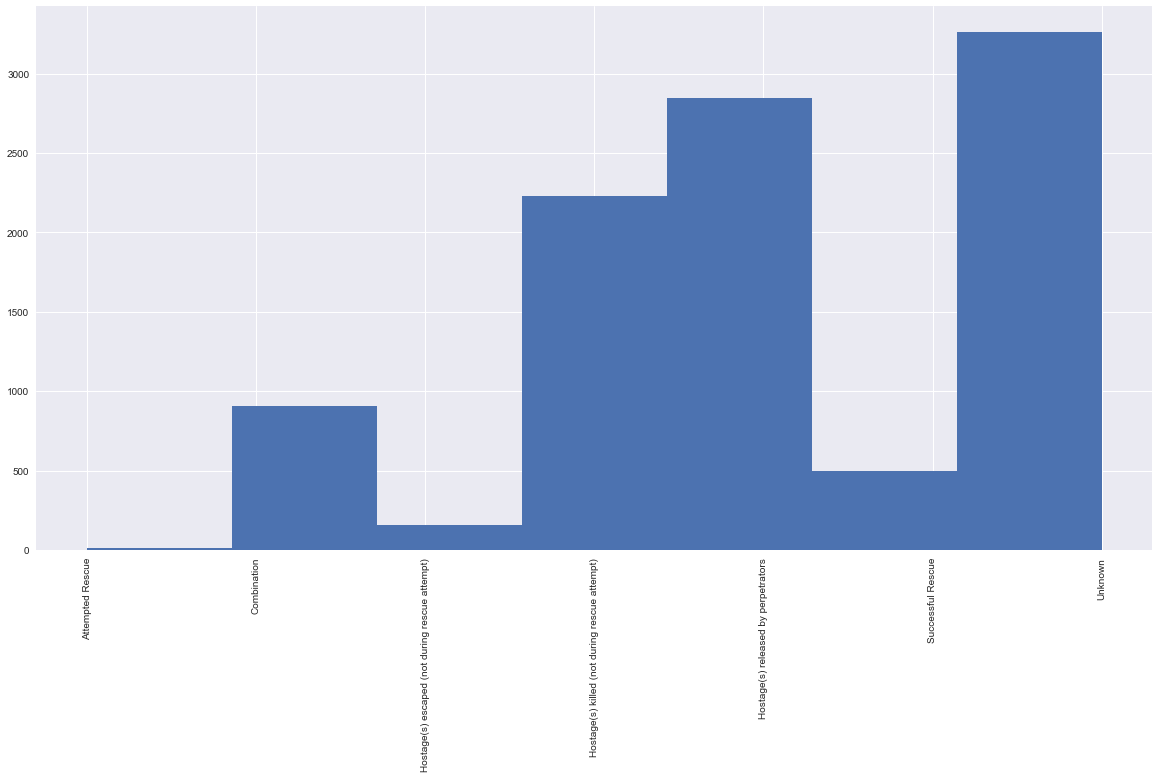

In [45]:
plt.figure(figsize=(20,10))
plt.hist(df['hostkidoutcome_txt'].dropna(), bins=7)
plt.xticks(rotation='vertical');

In [46]:
df['hostkidoutcome_txt'].dropna().value_counts()

Unknown                                           3260
Hostage(s) released by perpetrators               2849
Hostage(s) killed (not during rescue attempt)     2229
Combination                                        906
Successful Rescue                                  496
Hostage(s) escaped (not during rescue attempt)     156
Attempted Rescue                                    15
Name: hostkidoutcome_txt, dtype: int64

## Investigating suicide attacks

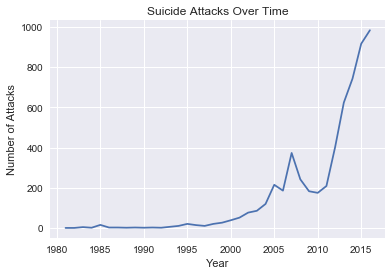

In [47]:
plt.plot(df[df['suicide'] == 1].groupby('iyear').count()['eventid'])
plt.title('Suicide Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks');

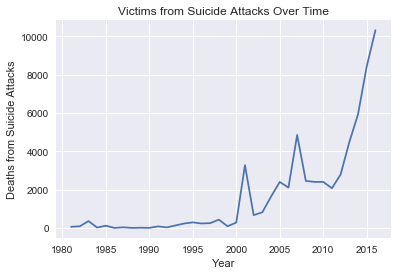

In [48]:
plt.plot(df[df['suicide'] == 1].groupby('iyear').sum()['nkill'])
plt.title('Victims from Suicide Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Deaths from Suicide Attacks');

In [49]:
def plot_group_s(group_name):
    plt.plot(df[(df['gname'] == group_name) & (df['suicide'] == 1)].groupby('iyear').sum()['nkill'], label=group_name)
    plt.title('Suicide Attacks by Terrorist Organization')
    plt.xlabel('Year')
    plt.ylabel('Number of Fatalities')
    plt.legend();

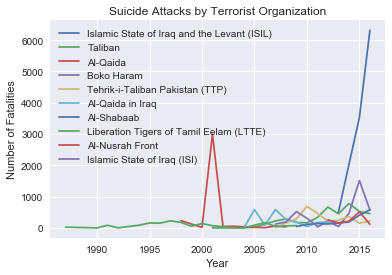

In [50]:
for group, count in df[df['suicide'] == 1].groupby('gname').sum()['nkill'].sort_values(ascending=False)[1:11].iteritems():
    plot_group_s(group)

## Looking at attacks against us citizens

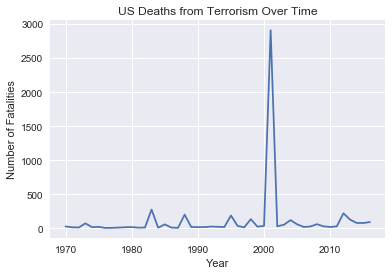

In [51]:
plt.plot(df.groupby('iyear').sum()['nkillus'])
plt.title('US Deaths from Terrorism Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities');

In [52]:
def plot_citizens(country_name):
    plt.plot(df[df['natlty1_txt'] == country_name].groupby('iyear').sum()['nkill'], label=country_name)
    plt.title('Attacks on Nationals')
    plt.xlabel('Year')
    plt.ylabel('Number of Fatalities')
    plt.legend();

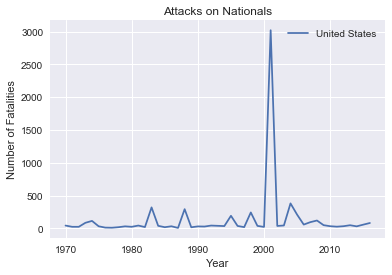

In [53]:
#As a sanity check this should look the same as above.
plot_citizens('United States')

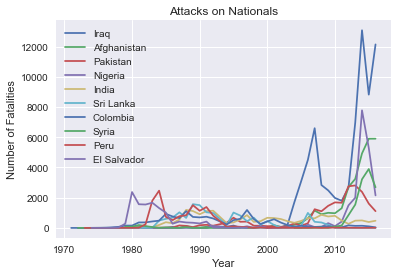

In [54]:
for country, count in df.groupby('natlty1_txt').sum()['nkill'].sort_values(ascending=False)[0:10].iteritems():
    plot_citizens(country)

In [55]:
sum(df['natlty3_txt'].value_counts())

1006

In [56]:
df['natlty1_txt'].dropna().shape

(168956,)

In [57]:
df[df['natlty1_txt']=='United States'][['iyear','natlty1_txt','natlty2_txt','natlty3_txt','nkill','nkillus']].sort_values(by='nkillus', ascending=False)

,iyear,natlty1_txt,natlty2_txt,natlty3_txt,nkill,nkillus
73054,2001,United States,United States,United States,1383.0,1358.0
73055,2001,United States,United States,United States,1382.0,1325.0
20000,1983,United States,NaN,NaN,241.0,241.0
36594,1988,United States,NaN,NaN,270.0,189.0
73056,2001,United States,United States,United States,189.0,181.0
58966,1995,United States,NaN,NaN,168.0,168.0
163191,2016,United States,Multinational,NaN,50.0,44.0
73057,2001,United States,United States,United States,44.0,38.0
2065,1973,United States,NaN,NaN,30.0,30.0
77220,2004,United States,Iraq,United States,22.0,20.0


In [58]:
def plot_group_US(group_name):
    plt.plot(df[(df['gname'] == group_name)].groupby('iyear').sum()['nkillus'], label=group_name)
    plt.title('Attacks on US Citizens by Terrorist Organization')
    plt.xlabel('Year')
    plt.ylabel('Number of Fatalities')
    plt.legend();

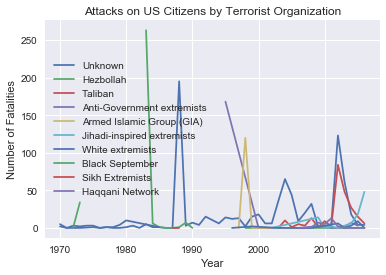

In [59]:
for group, count in df.groupby('gname').sum()['nkillus'].sort_values(ascending=False)[1:11].iteritems():
    plot_group_US(group)

## Looking at each variable in preparation for the modeling

### Approximate Date

In [60]:
len(df[df['iyear'] == 0])/len(df['iyear'])

0.0

In [61]:
len(df[df['imonth'] == 0])/len(df['imonth'])

0.00011740534194305841

In [62]:
len(df[df['iday'] == 0])/len(df['iday'])

0.005230407983563252

In [63]:
len(df[(df['iday'] == 0) & (df['nkill'] > 0)]) 

310

### Doubt Terrorism Proper

In [64]:
df['doubtterr'].value_counts()

 0    129942
 1     26622
-9     13786
Name: doubtterr, dtype: int64

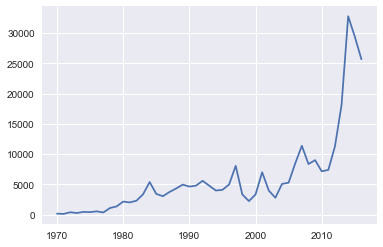

In [65]:
plt.plot(df[df['doubtterr'] == 0].groupby('iyear').sum()['nkill']);

I will exclude any doubtful claims since we are only interested in a terror attack that is certain

In [66]:
len(df['gname'].unique())

3454

In [67]:
len(df[(df['doubtterr'] !=1) & (df['nkill'] >100)]['gname'].unique())

54

In [68]:
len(df[(df['doubtterr'] !=1) & (df['nkill'] >100)])

134

### Attack type

In [69]:
df['attacktype3_txt'].value_counts()

Facility/Infrastructure Attack         185
Armed Assault                          110
Hostage Taking (Kidnapping)             53
Bombing/Explosion                       16
Assassination                            4
Hijacking                                4
Hostage Taking (Barricade Incident)      2
Name: attacktype3_txt, dtype: int64

### Unaffiliated Individuals

In [70]:
df['individual'].value_counts()

0    169927
1       423
Name: individual, dtype: int64

In [71]:
df[df['claimmode'].isnull()].shape

(154102, 135)

In [72]:
df['nperps'].value_counts()

-99.0       73051
 1.0         7517
 2.0         5611
 3.0         2626
 4.0         2084
 5.0         1013
 6.0          737
 10.0         612
 20.0         609
 30.0         566
 50.0         528
 100.0        428
 15.0         409
 7.0          359
 8.0          347
 200.0        285
 40.0         275
 12.0         261
 25.0         178
 60.0         150
 9.0          139
 0.0          139
 300.0        134
 150.0        127
 70.0          86
 80.0          77
 24.0          68
 13.0          63
 11.0          54
 500.0         50
            ...  
 125.0          2
 39.0           2
 86.0           2
 25000.0        1
 59.0           1
 900.0          1
 84.0           1
 44.0           1
 3200.0         1
 56.0           1
 72.0           1
 64.0           1
 230.0          1
 42.0           1
 370.0          1
 53.0           1
 48.0           1
 290.0          1
 190.0          1
 2500.0         1
 138.0          1
 52.0           1
 68.0           1
 49.0           1
 38.0     

In [73]:
df[df['nkill'].isnull()].shape

(9682, 135)

In [74]:
df[df['nkillus'].isnull()].shape

(64459, 135)

In [75]:
df[df['nkillus'] == 0].shape

(105030, 135)

In [76]:
df[df['nkill'] == 0].shape

(82925, 135)

In [77]:
df['nkill'].value_counts()

0.0       82925
1.0       34256
2.0       13247
3.0        7170
4.0        4580
5.0        3306
6.0        2389
7.0        1828
8.0        1390
10.0       1112
9.0         979
11.0        783
12.0        704
13.0        534
15.0        534
14.0        453
16.0        370
20.0        348
18.0        302
17.0        295
25.0        204
19.0        195
30.0        185
21.0        183
22.0        169
23.0        139
24.0        126
40.0        124
26.0        113
27.0        106
          ...  
152.0         1
375.0         1
320.0         1
189.0         1
304.0         1
109.0         1
165.0         1
329.0         1
190.0         1
283.0         1
518.0         1
143.0         1
287.0         1
284.0         1
256.0         1
422.0         1
1180.0        1
298.0         1
134.0         1
227.0         1
151.0         1
433.0         1
310.0         1
119.0         1
315.0         1
212.0         1
184.0         1
142.0         1
135.0         1
280.0         1
Name: nkill, Length: 199

In [78]:
pd.set_option('max_colwidth',10000)
df.sort_values(by='nkill', ascending=False)[['iyear','gname','summary','nkill']].head()

,iyear,gname,summary,nkill
133316,2014,Islamic State of Iraq and the Levant (ISIL),"06/12/2014: Assailants abducted approximately 1686 soldiers from Camp Speicher in Tikrit city, Saladin governorate, Iraq. Two captives escaped custody and at least 1500, if not all of the remaining victims, are presumed dead. The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.",1500.0
73054,2001,Al-Qaida,"09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the first attack, which occurred at 8:46 am local time, American Airlines Flight 11 crashed into the North Tower of the World Trade Center Complex in New York City, New York. Five hijackers belonging to Al-Qaida took control of the Boeing 767 aircraft on a flight originating from Logan International Airport in Boston, Massachusetts, and destined for Los Angeles International Airport. There were 76 passengers, 11 crew members and five hijackers on the plane, all of whom died upon impact. The North Tower collapsed at 10:28 a.m. local time after the South Tower had collapsed at 9:59 a.m. local time. A combined total of 2,764 people died in the World Trade Center attacks and thousands of others were injured. Al-Qaida leaders such as Osama bin Laden and Khalid Shaikh Mohammed claimed responsibility for the attacks in multiple videotaped interviews over the next few years.",1383.0
73055,2001,Al-Qaida,"09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the second of these attacks, which occurred at 9:03 a.m. local time, United Airlines Flight 175 crashed into the South Tower of the World Trade Center Complex in New York City, New York. Five hijackers belonging to Al-Qaida, hijacked the Boeing 767 aircraft on a flight originating from Logan International Airport in Boston, Massachusetts, and destined for Los Angeles International Airport. There were 56 passengers, nine crew members and five hijackers on the plane, all of whom died upon impact. The South Tower collapsed at 9:59 a.m. local time, killing all who were trapped inside or located nearby. The North Tower collapsed, after having been struck by American Airlines Flight 11, at 10:28 a.m. local time. A total of 2,764 people died in the two World Trade Center attacks. Al-Qaida leaders such as Osama bin Laden and Khalid Shaikh Mohammed claimed responsibility for the attacks in multiple videotaped interviews over the following years.",1382.0
55860,1994,Hutu extremists,NaN,1180.0
133023,2014,Islamic State of Iraq and the Levant (ISIL),"06/10/2014: Assailants stormed Badush prison in Badush city, Nineveh governorate, Iraq. The assailants separated the Shiite and Sunni prisoners, releasing the Sunni inmates and killing 670 Shiite prisoners. This was one of six coordinated incidents on the same day and one of three similar attacks targeting jails and prisons in the area. Islamic State of Iraq and the Levant (ISIL) claimed responsibility for the incidents.",670.0


In [79]:
df[df['property'].isnull()].shape

(0, 135)

In [80]:
df[df['property'] == -9].shape

(19579, 135)

In [81]:
df[df['propextent'] == 4].shape

(19066, 135)

In [82]:
df[df['propextent'].isnull()].shape

(109805, 135)

In [83]:
df[df['propvalue'].isnull()].shape

(134863, 135)

In [84]:
df[df['guncertain1'].isnull()].shape

(379, 135)

In [85]:
df[df['guncertain1'] == 1].shape

(14338, 135)

In [86]:
df[df['claimmode'] == 10].shape

(3673, 135)

In [87]:
df[df['claimmode'].isnull()].shape

(154102, 135)

In [88]:
df[df['claimed'].isnull()].shape

(66134, 135)

In [89]:
df[df['compclaim'].isnull()].shape

(165595, 135)

In [90]:
df[df['ishostkid'].isnull()].shape

(178, 135)

In [91]:
df[df['ishostkid'] == -9].shape

(269, 135)

In [92]:
df[df['nhostkid'].isnull()].shape

(157858, 135)

In [93]:
df[df['nhostkidus'].isnull()].shape

(157913, 135)

In [94]:
df[df['nhours'].isnull()].shape

(166649, 135)

In [95]:
df[df['ndays'].isnull()].shape

(162942, 135)

In [96]:
df[df['divert'].isnull()].shape

(170037, 135)

In [97]:
df[df['kidhijcountry'].isnull()].shape

(167051, 135)

In [98]:
df[df['ransom'].isnull()].shape

(94037, 135)

In [99]:
df[df['ransom'] == -9].shape

(1358, 135)

In [48]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       39994
Military                          25508
Police                            22938
Government (General)              20314
Business                          19873
Transportation                     6657
Utilities                          5848
Unknown                            4873
Religious Figures/Institutions     4198
Educational Institution            4160
Government (Diplomatic)            3424
Terrorists/Non-State Militia       2859
Journalists & Media                2806
Violent Political Party            1717
Airports & Aircraft                1332
Telecommunication                   982
NGO                                 912
Other                               621
Tourists                            429
Maritime                            338
Food or Water Supply                304
Abortion Related                    263
Name: targtype1_txt, dtype: int64

In [46]:
pd.set_option('max_colwidth',10000)
df[(df['gname']=='National Socialist Underground') & (df['nkill'] >0)][['gname','summary']]

,gname,summary
70900,National Socialist Underground,"09/09/2000: Assailants opened fire on Turkish flower store owner Enver Simsak in Nuremberg city, Bavaria state, Germany. Simsak was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
72294,National Socialist Underground,"06/13/2001: Assailants opened fire on Turkish tailor Abdurrahim Ozudogru in Nuremberg city, Bavaria state, Germany. Ozudogru was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
72333,National Socialist Underground,"06/27/2001: Assailants opened fire on Turkish vegetable shop owner Suleyman Taskopru in Hamburg city, Hamburg state, Germany. Taskopru was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
72960,National Socialist Underground,"08/29/2001: Assailants opened fire on Turkish greengrocer Habil Kilic in Munich city, Bavaria state, Germany. Kilic was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
76198,National Socialist Underground,"02/25/2004: Assailants opened fire on Turkish kebab shop employee Yunis Turgut in Rostock city, Mecklenburg-Vorpommern state, Germany. Turgut was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
78156,National Socialist Underground,"06/09/2005: Assailants opened fire on Turkish kebab shop owner Ismail Yasar in Nuremberg city, Bavaria state, Germany. Yasar was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
78186,National Socialist Underground,"06/15/2005: Assailants opened fire on Greek locksmith Theodorus Boulgarides in Munich city, Bavaria state, Germany. Boulgarides was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
80204,National Socialist Underground,"06/09/2005: Assailants opened fire on Turkish kebab shop owner Mehmet Kubasik in Dortmund city, North Rhine-Westphalia state, Germany. Kubasik was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
80242,National Socialist Underground,"06/09/2005: Assailants opened fire on Turkish internet cafe owner Halit Yozgat in Kassel city, Hesse state, Germany. Yozgat was killed in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house."
82826,National Socialist Underground,"04/25/2007: Assailants opened fire on German police officer Michele Kiesewetter in Heilbronn city, Baden-Wurttemberg state, Germany. Kiesewetter was killed and her colleague was injured in the attack. The Nationalist Socialist Underground claimed responsibility on a digital video disc (DVD) later found in a member's house. Sources speculated that Kiesewetter was killed because her father had tried to buy a pub that group members were using as a local meeting place and she had recognized the group members in a chance encounter."


In [42]:
model_features = ['gname',
                  'iyear', 
                  'imonth',
                  'iday',
                  'multiple',
                  'success',
                  'suicide',
                  'nkill',
                  'nkillus',
                  'nkillter',
                  'nwound',
                  'nwoundte',
                  'ishostkid',
                  'property',
                  'country_txt',
                  'city',
                  'attacktype1_txt',
                  'weaptype1_txt',
                  'targtype1_txt',
                  'natlty1_txt']

df.loc[142257, model_features]

gname              Al-Qaida in the Arabian Peninsula (AQAP)
iyear                                                  2015
imonth                                                    1
iday                                                      7
multiple                                                  0
success                                                   1
suicide                                                   0
nkill                                                    12
nkillus                                                   0
nkillter                                                  0
nwound                                                   12
nwoundte                                                  0
ishostkid                                                 1
property                                                  1
country_txt                                          France
city                                                  Paris
attacktype1_txt         Hostage Taking (